In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats

<h1> Research Questions </h1>

In [2]:
with open('data/ex-man-export-1.json', 'r') as outfile:
    data1 = json.load(outfile)
with open('data/ex-man-export-2.json', 'r') as outfile:
    data2 = json.load(outfile)
with open('data/ex-man-export-3.json', 'r') as outfile:
    data3 = json.load(outfile)
with open('data/ex-man-export-4.json', 'r') as outfile:
    data4 = json.load(outfile)

dataset = [data1,data2,data3,data4]

In [3]:
def create_focusDF(data):
    
    percentage_goals = []
    broken_Focus = []
    
    # transform json part to pandas dataframe
    df = pd.json_normalize(data["focusSessions"])
    
    # create new column, which calculates how long a user stayed in focus
    df["minutesInFocus"] = round((df["endTime"] - df["startTime"])/60000,2)
    
    # calculate percentage of achieved goals
    for index, row in df.iterrows():
        if len(row['goals']) == 0:
            percentage_goals.append(0)
        else:
            percentage_goals.append(round(len(row['completedGoals'])/len(row['goals']),2))
        
        if len(row["brokenFocus"]) == 0:
            broken_Focus.append(0)
        else:
            break_per_focus= 0
            for element in row["brokenFocus"]:
                break_per_focus += ((element[1]-element[0])/60000)
            broken_Focus.append(round(break_per_focus,2))
    df["brokenFocus"] = broken_Focus
            
            
    df["percentageCompletedGoals"] = percentage_goals
    
    
    
    # drop columns startTime, endTime, originalEndTime, goals and completedGoals
    df = df.drop(['startTime', 'endTime','originalEndTime','goals','completedGoals'], axis=1)
    return df

df1 = create_focusDF(data1)
df2 = create_focusDF(data2)
df3 = create_focusDF(data3)
df4 = create_focusDF(data4)
    
    
    
focusdf = pd.concat([df1,df2,df3,df4], keys=["df1", "df2", "df3", "df4"])


In [4]:
df_survey1 =  pd.json_normalize(data1["randomSurveyResults"])
df_survey2 =  pd.json_normalize(data2["randomSurveyResults"])
df_survey3 =  pd.json_normalize(data3["randomSurveyResults"])
df_survey4 =  pd.json_normalize(data4["randomSurveyResults"])

df_surveyframes= [df_survey1,df_survey2,df_survey3,df_survey4]

df_survey = pd.concat(df_surveyframes, keys=["a","b","c","d"])

<h3>RQ1: What is the effect of blocking notifications on productivity levels? </h3>

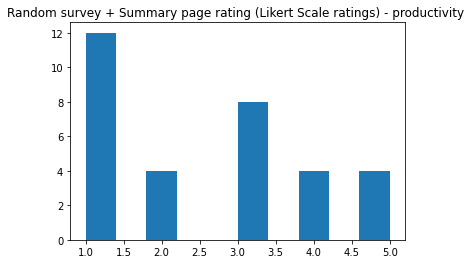

In [5]:
counts, bins = np.histogram(df_survey["productivity"])
plt.hist(bins[:-1], bins, weights=counts)
plt.title("Random survey + Summary page rating (Likert Scale ratings) - productivity ")

plt.show()

<h3>RQ2: Is optional blocking of distractions and notifications enough to enable people to focus completely? 
</h3>

<h3>RQ3: How desirable are auto-response messages for knowledge workers? What are example situations where auto-response would be useful?  </h3>

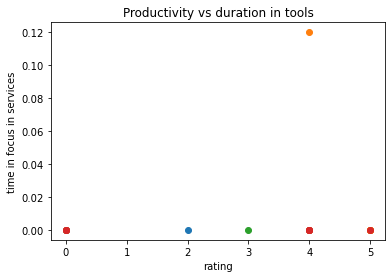

In [6]:
plt.scatter(df1["rating"],df1["brokenFocus"])
plt.scatter(df2["rating"],df2["brokenFocus"])
plt.scatter(df3["rating"],df3["brokenFocus"])
plt.scatter(df4["rating"],df4["brokenFocus"])

slope, intercept, r, p, stderr = scipy.stats.linregress(focusdf["rating"], focusdf["brokenFocus"])
plt.plot(focusdf["rating"], intercept + slope * focusdf["rating"])


plt.xlabel("rating")
plt.ylabel("time in focus in services")
plt.title("Productivity vs duration in tools")

plt.show()

<h3>RQ4: OPTIONAL: How was the app used? What is the timing of the start and length of focus sessions? </h3>

<h3> RQ5: What are the biggest impacts on goal achievement and productivity levels? (breaking focus time, focus session length, goal setting practices etc) 
</h3>

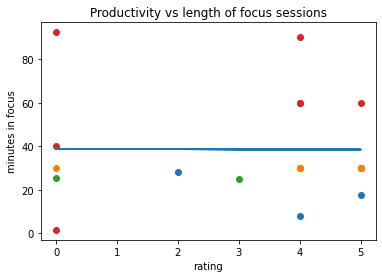

In [7]:
plt.scatter(df1["rating"],df1["minutesInFocus"])
plt.scatter(df2["rating"],df2["minutesInFocus"])
plt.scatter(df3["rating"],df3["minutesInFocus"])
plt.scatter(df4["rating"],df4["minutesInFocus"])


focusdf['rating'].fillna(value=focusdf['rating'].mean(), inplace=True)

slope, intercept, r, p, stderr = scipy.stats.linregress(focusdf["rating"], focusdf["minutesInFocus"])
plt.plot(focusdf["rating"], intercept + slope * focusdf["rating"])


plt.xlabel("rating")
plt.ylabel("minutes in focus")
plt.title("Productivity vs length of focus sessions")

plt.show()

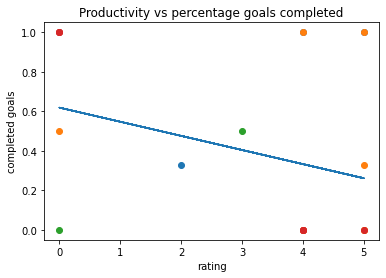

In [8]:
plt.scatter(df1["rating"],df1["percentageCompletedGoals"])
plt.scatter(df2["rating"],df2["percentageCompletedGoals"])
plt.scatter(df3["rating"],df3["percentageCompletedGoals"])
plt.scatter(df4["rating"],df4["percentageCompletedGoals"])

slope, intercept, r, p, stderr = scipy.stats.linregress(focusdf["rating"], focusdf["percentageCompletedGoals"])
plt.plot(focusdf["rating"], intercept + slope * focusdf["rating"])


plt.xlabel("rating")
plt.ylabel("completed goals")
plt.title("Productivity vs percentage goals completed")

plt.show()